##  CAR PRICE PREDICTION


In [1]:
# Importing the all the importent library's

import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model as lmd
import seaborn as sns

In [2]:
# Getting the Data

data=pd.read_csv('C:/Users/SUDHANSHU/Desktop/car data.csv')
data.info


<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1  

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## PROCESSING THE DATA 


In [5]:
# creating the dummies for each of thoes columns
dummy1=pd.get_dummies(data.Fuel_Type)
dummy2=pd.get_dummies(data.Seller_Type)
dummy3=pd.get_dummies(data.Transmission)

In [6]:
data=pd.concat([data,dummy1,dummy2,dummy3],axis='columns')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,",8",Dealer,Individual,Automatic,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,0,1,0,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0,0,1,0,1,0,0,1
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0,0,1,0,1,0,0,1
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,0,1,0,0,1,0,0,1


In [7]:
# If we have n dummies for a column then we should use only two since the last one is of no use 
# Now we will remove the unwanted columns like Car_name, extra dummies

data=data.drop(['Car_Name','CNG',',8','Dealer','Manual','Transmission','Seller_Type','Fuel_Type'],axis='columns')
data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Automatic
0,2014,3.35,5.59,27000,0,0,1,0,0
1,2013,4.75,9.54,43000,0,1,0,0,0
2,2017,7.25,9.85,6900,0,0,1,0,0
3,2011,2.85,4.15,5200,0,0,1,0,0
4,2014,4.60,6.87,42450,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1,0,0,0
297,2015,4.00,5.90,60000,0,0,1,0,0
298,2009,3.35,11.00,87934,0,0,1,0,0
299,2017,11.50,12.50,9000,0,1,0,0,0


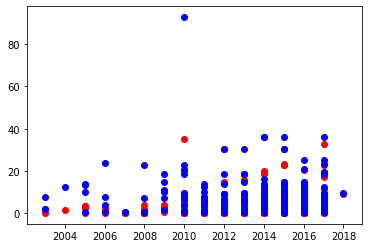

In [8]:
%matplotlib inline
#sns.set()
plt.scatter(data['Year'],data['Selling_Price'],c='r')
plt.scatter(data['Year'],data['Present_Price'],c='b')
plt.show()

# Traning - Predicting - Accuracy  

In [13]:
# Our program is going to predict the selling price 

y=data.Selling_Price # Y is our Traget vriable
X=data.drop(['Selling_Price'],axis=1)

In [14]:
# here test size= 0.2 , implies that 20% of the data set will be used for testing the data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:

from sklearn.linear_model import LinearRegression
Lr = LinearRegression(normalize=True)
Lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
y_pred = Lr.predict(X_test)
y_pred_ = pd.DataFrame(y_pred)

In [17]:

df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
285,7.40,7.846362
248,4.00,2.952394
150,0.50,-0.587522
217,3.15,4.194033
107,1.25,0.485204
...,...,...
62,18.75,20.496584
154,0.50,0.662858
218,6.45,5.387942
286,5.65,5.642560


In [18]:
from sklearn.metrics import r2_score
print('r_2 score:', r2_score(y_test, y_pred))

r_2 score: 0.8622805066618531
